# An introduction to `relatio`
**Runtime $\sim$ 20min**

Original paper: ["Text Semantics Capture Political and Economic Narratives"](https://arxiv.org/abs/2108.01720)

----------------------------

This is a short demo of the package `relatio`.  It takes as input a text corpus and outputs a list of narrative statements. The pipeline is unsupervised: the user does not need to specify narratives beforehand. Narrative statements are defined as tuples of semantic roles with a (agent, verb, patient) structure.

Here, we present the main functions to quickly obtain narrative statements from a corpus.

----------------------------

In this tutorial, we work with the Trump Tweet Archive corpus.

----------------------------

In [2]:
!pip uninstall torch torchvision torchaudio -y
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Found existing installation: torch 1.12.1
Uninstalling torch-1.12.1:
  Successfully uninstalled torch-1.12.1
Found existing installation: torchvision 0.13.1
Uninstalling torchvision-0.13.1:
  Successfully uninstalled torchvision-0.13.1
Found existing installation: torchaudio 2.5.1+cu118
Uninstalling torchaudio-2.5.1+cu118:
  Successfully uninstalled torchaudio-2.5.1+cu118
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.5.1%2Bcu118-cp310-cp310-linux_x86_64.whl (838.3 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.20.1%2Bcu118-cp310-cp310-linux_x86_64.whl (6.5 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.5.1%2Bcu118-cp310-cp310-linux_x86_64.whl (3.3 MB)
  Using cached https://download.pytorch.org/whl/typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typ

In [1]:
import torch
print(torch.__version__)  # Ensure it's the desired version
print(torch.cuda.is_available())  # Ensure CUDA is available
print(torch.version.cuda)  # Ensure it shows 11.8


2.5.1+cu118
True
11.8


In [2]:
!pip install accelerate==0.22.0 huggingface_hub==0.16.4

  Using cached huggingface_hub-0.16.4-py3-none-any.whl.metadata (12 kB)
Using cached huggingface_hub-0.16.4-py3-none-any.whl (268 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.10.1
    Uninstalling huggingface-hub-0.10.1:
      Successfully uninstalled huggingface-hub-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.10.1 requires torch<1.13.0,>=1.10.0, but you have torch 2.5.1+cu118 which is incompatible.
allennlp 2.10.1 requires torchvision<0.14.0,>=0.8.1, but you have torchvision 0.20.1+cu118 which is incompatible.
allennlp-models 2.10.1 requires torch<1.13.0,>=1.7.0, but you have torch 2.5.1+cu118 which is incompatible.
cached-path 1.1.6 requires huggingface-hub<0.11.0,>=0.8.1, but you have huggingface-hub 0.16.4 which is incompatible.
diffusers 0.31.0 requires huggingface-hub>=0.23.2, but you

In [3]:
!pip install relatio

  Using cached torch-1.12.1-cp310-cp310-manylinux1_x86_64.whl.metadata (22 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached torchvision-0.13.1-cp310-cp310-manylinux1_x86_64.whl.metadata (10 kB)
  Using cached huggingface_hub-0.10.1-py3-none-any.whl.metadata (6.1 kB)
Using cached torch-1.12.1-cp310-cp310-manylinux1_x86_64.whl (776.3 MB)
Using cached torchvision-0.13.1-cp310-cp310-manylinux1_x86_64.whl (19.1 MB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
Using cached huggingface_hub-0.10.1-py3-none-any.whl (163 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu118
    Uninstalling torch-2.5.1+cu118:
      Successfully uninstalled torch-2.5.1+cu118
  Attempting uninstall: huggingface-hub
    Found existi

In [3]:
import relatio

/usr/local/lib/python3.10/dist-packages/fairscale/experimental/nn/offload.py:19: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_fwd(orig_func)  # type: ignore
/usr/local/lib/python3.10/dist-packages/fairscale/experimental/nn/offload.py:30: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_bwd(orig_func)  # type: ignore


In [4]:
# Catch warnings for an easy ride
from relatio import FileLogger
logger = FileLogger(level = 'WARNING')

In [5]:
import pandas as pd

In [6]:
from relatio import load_data
#dd = load_data(dataset = "trump_tweet_archive", content = "raw")
#dp=pd.read_csv("/content/debate_sentiment_left.csv")

In [7]:
df=pd.read_excel("/content/leftrelatio (1).xlsx")

In [8]:
# Method 1: Using str.lower() - for a single column
df['doc'] = df['doc'].str.lower()

In [9]:
df

,id,doc
0,107,we can look for a citizen at the turn of 1989 ...
1,1604,little essential though i believe it has its g...
2,2109,i certainly agree with the minister that the b...
3,2109,so the state and its part of chapter 333 are n...
4,2141,it would be possible to continue further but i...
...,...,...
1394,462833,the construction of the railway was carried ou...
1395,462833,"pavol lukša , kdu-čsl . continued to rule in t..."
1396,463294,"this is, moreover, our primary duty - an oblig..."
1397,465301,that people should banish orbán in hungary. no...


In [10]:
!python -m spacy download en_core_web_sm

2024-12-10 15:17:32.551816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 15:17:32.572559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 15:17:32.578882: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 15:17:33.771056: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.2 MB/s eta 0:00:00
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: 

In [11]:
from relatio import Preprocessor

p = Preprocessor(
    spacy_model = "en_core_web_sm",
    remove_punctuation = True,
    remove_digits = True,
    lowercase = True,
    lemmatize = True,
    remove_chars = ["\"",'-',"^",".","?","!",";","(",")",",",":","\'","+","&","|","/","{","}",
                    "~","_","`","[","]",">","<","=","*","%","$","@","#","’"],
    stop_words = [],
    n_process = -1,
    batch_size = 100
)

  _C._set_default_tensor_type(t)



In [12]:
df = p.split_into_sentences(
    df, output_path = None, progress_bar = True
)

Splitting into sentences...


100%|██████████| 1399/1399 [00:04<00:00, 334.72it/s]


In [14]:
from relatio import SRL

SRL = SRL(
    path = "https://storage.googleapis.com/allennlp-public-models/openie-model.2020.03.26.tar.gz",
    batch_size = 10,
    cuda_device=0
)

srl_res = SRL(df['sentence'][0:100], progress_bar=True)

from relatio import extract_roles

roles, sentence_index = extract_roles(
    srl_res,
    used_roles = ["ARG0","B-V","B-ARGM-NEG","B-ARGM-MOD","ARG1","ARG2"],
    only_triplets = True,
    progress_bar = True
)

for d in roles[0:20]: print(d)

Running SRL...


100%|██████████| 10/10 [01:30<00:00,  9.07s/it]


Extracting semantic roles...


100%|██████████| 100/100 [00:00<00:00, 1110.90it/s]

{'ARG0': 'we', 'B-V': 'look', 'B-ARGM-MOD': 'can', 'ARG1': 'for a citizen'}
{'ARG0': 'the one who', 'B-V': 'making', 'ARG1': 'advertising all over the world'}
{'ARG0': 'the one who', 'B-V': 'trying', 'ARG1': 'to make a modern messiah who is the only one who will save us'}
{'ARG0': 'who', 'B-V': 'make', 'ARG1': 'a modern messiah who is the only one who will save us'}
{'ARG0': 'who', 'B-V': 'will', 'ARG1': 'save us'}
{'ARG0': 'the only one who', 'B-V': 'save', 'B-ARGM-MOD': 'will', 'ARG1': 'us'}
{'ARG0': 'this left - wing intellectual who', 'B-V': 'guaranteed', 'ARG1': 'the impunity of all communist bosses who have been directly responsible for the past 40 years'}
{'ARG0': 'the communists themselves', 'B-V': 'cultivated', 'ARG1': "their future successors who also thanked them when the first thing they said was the quot we do n't want a witch hunt"}
{'ARG0': 'their future successors who', 'B-V': 'thanked', 'ARG1': 'them', 'ARG2': "we do n't want a witch hunt"}
{'ARG0': 'they', 'B-V': 'sai

In [15]:
sentence_index, roles = p.extract_svos(df['sentence'], expand_nouns = True, only_triplets = False, progress_bar = True)
for svo in roles[0:20]: print(svo)

Extracting SVOs...


100%|██████████| 2480/2480 [00:05<00:00, 466.95it/s]


{'ARG0': 'we', 'B-V': 'look'}
{'ARG0': 'one', 'B-V': 'making', 'ARG1': 'advertising'}
{'ARG0': 'making', 'B-V': 'trying'}
{'B-V': 'make', 'ARG1': 'a modern messiah'}
{'ARG0': 'one', 'B-V': 'save', 'ARG1': 'us'}
{'ARG0': 'this left-wing intellectual', 'B-V': 'guaranteed', 'ARG1': 'the impunity'}
{'ARG0': 'the communists', 'B-V': 'cultivated', 'ARG1': 'their future successors'}
{'ARG0': 'their future successors', 'B-V': 'thanked', 'ARG1': 'them'}
{'ARG0': 'they', 'B-V': 'said'}
{'ARG0': 'we', 'B-V': 'want', 'ARG1': 'a witch hunt'}
{'ARG0': 'i', 'B-V': 'believe'}
{'ARG0': 'it', 'B-V': 'has', 'ARG1': 'its general explanatory value'}
{'ARG0': 'the approach', 'B-V': 'missing'}
{'ARG0': 'we', 'B-V': 'see', 'ARG1': 'that'}
{'ARG0': 'the left sociologists', 'B-V': 'begin'}
{'B-V': 'shaping', 'ARG1': 'moral social consciousness'}
{'ARG0': 'i', 'B-V': 'like'}
{'B-V': 'point', 'ARG1': 'something'}
{'ARG0': 'doc radim knot gynecologist', 'B-V': 'attacked', 'ARG1': 'only the mention'}
{'ARG0': 'sexo

In [16]:
postproc_roles = p.process_roles(roles,
                                 max_length = 50,
                                 progress_bar = True,
                                 output_path = '/content/postproc_roles.json')

Cleaning phrases for role ARG0...


100%|██████████| 8476/8476 [00:07<00:00, 1120.29it/s]


Cleaning phrases for role B-V...


100%|██████████| 14288/14288 [00:12<00:00, 1151.64it/s]


Cleaning phrases for role B-ARGM-MOD...


0it [00:00, ?it/s]


Cleaning phrases for role ARG1...


100%|██████████| 6796/6796 [00:06<00:00, 1075.80it/s]


Cleaning phrases for role ARG2...


0it [00:00, ?it/s]


In [17]:
for d in postproc_roles[0:20]: print(d)

{'ARG0': 'we', 'B-V': 'look'}
{'ARG0': 'one', 'B-V': 'make', 'ARG1': 'advertising'}
{'ARG0': 'make', 'B-V': 'try'}
{'B-V': 'make', 'ARG1': 'a modern messiah'}
{'ARG0': 'one', 'B-V': 'save', 'ARG1': 'we'}
{'ARG0': 'this left wing intellectual', 'B-V': 'guarantee', 'ARG1': 'the impunity'}
{'ARG0': 'the communist', 'B-V': 'cultivate', 'ARG1': 'their future successor'}
{'ARG0': 'their future successor', 'B-V': 'thank', 'ARG1': 'they'}
{'ARG0': 'they', 'B-V': 'say'}
{'ARG0': 'we', 'B-V': 'want', 'ARG1': 'a witch hunt'}
{'ARG0': 'i', 'B-V': 'believe'}
{'ARG0': 'it', 'B-V': 'have', 'ARG1': 'its general explanatory value'}
{'ARG0': 'the approach', 'B-V': 'miss'}
{'ARG0': 'we', 'B-V': 'see', 'ARG1': 'that'}
{'ARG0': 'the left sociologist', 'B-V': 'begin'}
{'B-V': 'shape', 'ARG1': 'moral social consciousness'}
{'ARG0': 'i', 'B-V': 'like'}
{'B-V': 'point', 'ARG1': 'something'}
{'ARG0': 'doc radim knot gynecologist', 'B-V': 'attack', 'ARG1': 'only the mention'}
{'ARG0': 'sexologist', 'B-V': 'attac

In [18]:
from relatio.utils import load_roles
postproc_roles = load_roles('/content/postproc_roles.json')

In [19]:
known_entities = p.mine_entities(
    df['sentence'],
    clean_entities = True,
    progress_bar = True,
    output_path = '/content/entities.pkl'
)

for n in known_entities.most_common(10): print(n)

Mining named entities...


100%|██████████| 2480/2480 [00:04<00:00, 502.44it/s] 

('czech', 149)
('the czech republic', 122)
('european', 73)
('senate', 68)
('democrats', 43)
('the european union', 33)
('german', 27)
('the communist party of bohemia', 20)
('democrat', 16)
('the communist party', 15)


In [20]:
from relatio.utils import load_entities
known_entities = load_entities('/content/entities.pkl')

top_known_entities = [e[0] for e in list(known_entities.most_common(100)) if e[0] != '']

In [21]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)


2.5.1+cu118
True
11.8


In [23]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [21]:
import torch
print(torch.__version__)  # Ensure it shows the correct version (e.g., with cu118)
print(torch.cuda.is_available())  # Should return True
print(torch.version.cuda)  # Should show 11.8


1.12.1+cu102
True
10.2


In [22]:
from relatio.narrative_models import NarrativeModel

m = NarrativeModel(
    clustering = 'kmeans',
    PCA = True,
    UMAP = True,
    roles_considered = ['ARG0', 'B-V', 'B-ARGM-NEG', 'ARG1'],
    roles_with_known_entities = ['ARG0','ARG1'],
    known_entities = top_known_entities,
    assignment_to_known_entities = 'embeddings',
    roles_with_unknown_entities = ['ARG0','ARG1'],
    threshold = 0.1
)

m.fit(postproc_roles, progress_bar = True)

  return torch.load(checkpoint_file, map_location="cpu")



Computing phrase embeddings...


100%|██████████| 1924/1924 [00:16<00:00, 118.14it/s]


Computing phrase embeddings...


100%|██████████| 3055/3055 [00:25<00:00, 117.97it/s]


Computing phrase embeddings...


100%|██████████| 4455/4455 [00:37<00:00, 117.25it/s]


Dimension reduction via PCA...
PCA parameters:
{'n_components': 50, 'svd_solver': 'full'}
Dimension reduction via UMAP...
UMAP parameters:
{'n_neighbors': 15, 'n_components': 2, 'random_state': 0}


  warn(



Clustering phrases into clusters...
Clustering parameters chosen in this range:
{'n_clusters': [4, 10, 21, 32, 44], 'random_state': 0}


  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(



The silhouette score suggests the optimal number of clusters is 44. This corresponds to index 4.
The elbow method (inertia score) suggests the optimal number of clusters is 10. This corresponds to index 1.
Labeling the clusters by the most frequent phrases...


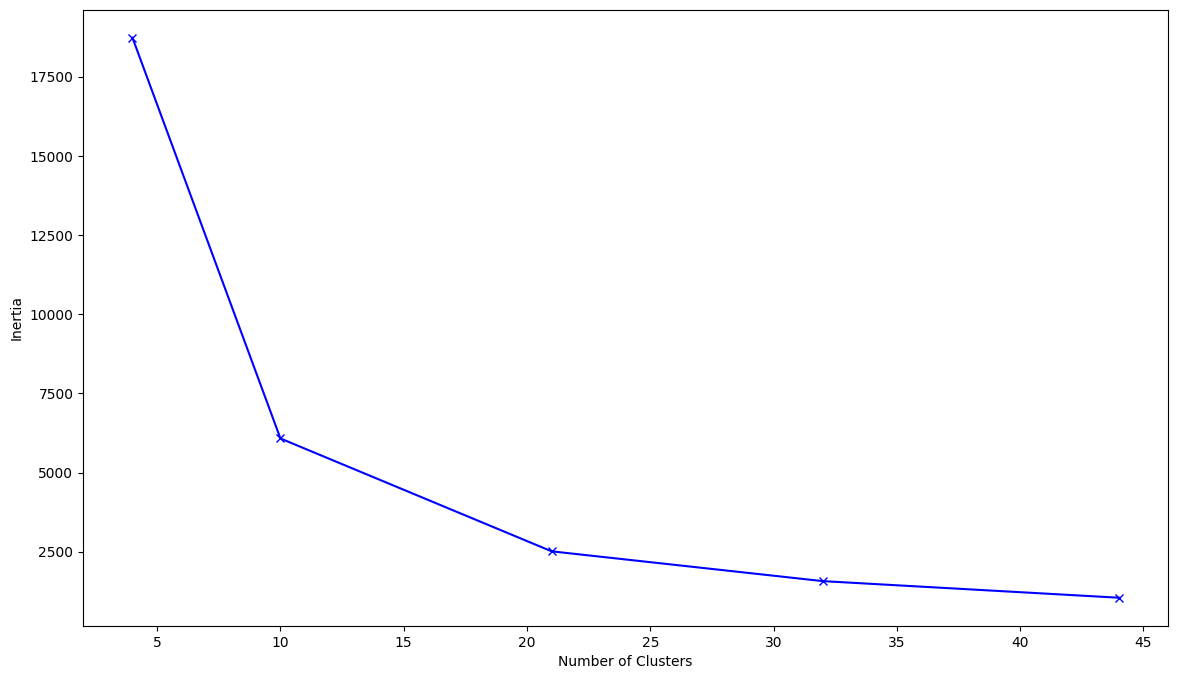

In [23]:
m.plot_selection_metric(metric = 'inertia')

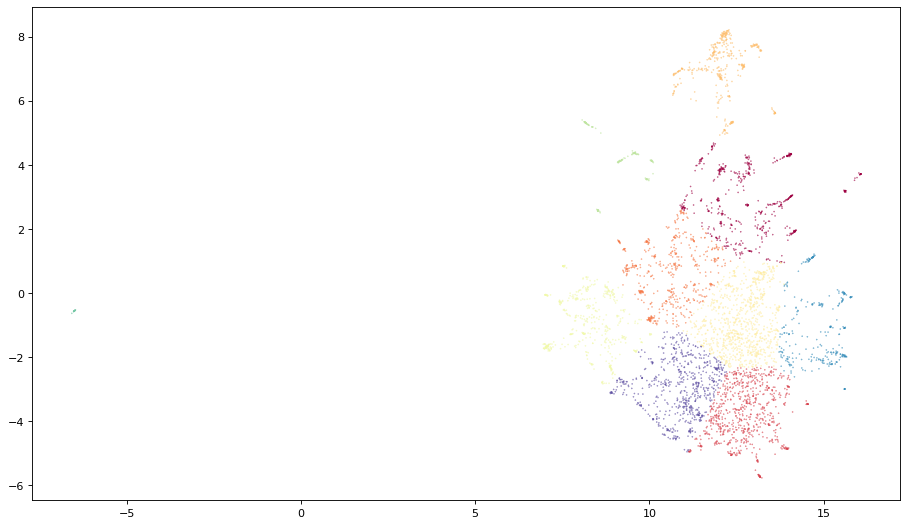

In [24]:
m.plot_clusters(path = '/content/clusters.pdf')

In [25]:
m.clusters_to_txt(path = '/content/clusters.txt')

In [26]:
narratives = m.predict(postproc_roles, progress_bar = True)


Predicting entities for role: ARG0...
Computing phrase embeddings...


100%|██████████| 8462/8462 [01:05<00:00, 129.16it/s]


Matching known entities (with embeddings distance)...
Matching unknown entities (with clustering model)...
Dimension reduction of vectors (PCA)...
Dimension reduction of vectors (UMAP)...
Assignment to clusters...

Predicting entities for role: ARG1...
Computing phrase embeddings...


100%|██████████| 6743/6743 [00:53<00:00, 126.38it/s]


Matching known entities (with embeddings distance)...
Matching unknown entities (with clustering model)...
Dimension reduction of vectors (PCA)...
Dimension reduction of vectors (UMAP)...
Assignment to clusters...


In [31]:
narratives

[{'ARG0': 'i', 'B-V': 'look'},
 {'ARG0': 'i', 'B-V': 'make', 'ARG1': 'they'},
 {'ARG0': 'i', 'B-V': 'try'},
 {'B-V': 'make', 'ARG1': 'gentleman'},
 {'ARG0': 'i', 'B-V': 'save', 'ARG1': 'i'},
 {'ARG0': 'the left', 'B-V': 'guarantee', 'ARG1': 'which'},
 {'ARG0': 'the minister', 'B-V': 'cultivate', 'ARG1': 'gentleman'},
 {'ARG0': 'gentleman', 'B-V': 'thank', 'ARG1': 'they'},
 {'ARG0': 'they', 'B-V': 'say'},
 {'ARG0': 'i', 'B-V': 'want', 'ARG1': 'colleague'},
 {'ARG0': 'i', 'B-V': 'believe'},
 {'ARG0': 'i', 'B-V': 'have', 'ARG1': 'which'},
 {'ARG0': 'which', 'B-V': 'miss'},
 {'ARG0': 'i', 'B-V': 'see', 'ARG1': 'i'},
 {'ARG0': 'the left', 'B-V': 'begin'},
 {'B-V': 'shape', 'ARG1': 'they'},
 {'ARG0': 'i', 'B-V': 'like'},
 {'B-V': 'point', 'ARG1': 'i'},
 {'ARG0': 'gentleman', 'B-V': 'attack', 'ARG1': 'which'},
 {'ARG0': 'gentleman', 'B-V': 'attack', 'ARG1': 'which'},
 {'ARG0': 'i', 'B-V': 'agree'},
 {'B-V': 'earmark', 'ARG1': 'money'},
 {'ARG0': 'the minister', 'B-V': 'offer', 'ARG1': 'i'},
 

In [27]:
from relatio.utils import prettify

pretty_narratives = []
for n in narratives:
    pretty_narratives.append(prettify(n))

for i in range(10):
    print(roles[i])
    print(postproc_roles[i])
    print(pretty_narratives[i])

{'ARG0': 'we', 'B-V': 'look'}
{'ARG0': 'we', 'B-V': 'look'}
i look
{'ARG0': 'one', 'B-V': 'making', 'ARG1': 'advertising'}
{'ARG0': 'one', 'B-V': 'make', 'ARG1': 'advertising'}
i make they
{'ARG0': 'making', 'B-V': 'trying'}
{'ARG0': 'make', 'B-V': 'try'}
i try
{'B-V': 'make', 'ARG1': 'a modern messiah'}
{'B-V': 'make', 'ARG1': 'a modern messiah'}
make gentleman
{'ARG0': 'one', 'B-V': 'save', 'ARG1': 'us'}
{'ARG0': 'one', 'B-V': 'save', 'ARG1': 'we'}
i save i
{'ARG0': 'this left-wing intellectual', 'B-V': 'guaranteed', 'ARG1': 'the impunity'}
{'ARG0': 'this left wing intellectual', 'B-V': 'guarantee', 'ARG1': 'the impunity'}
the left guarantee which
{'ARG0': 'the communists', 'B-V': 'cultivated', 'ARG1': 'their future successors'}
{'ARG0': 'the communist', 'B-V': 'cultivate', 'ARG1': 'their future successor'}
the minister cultivate gentleman
{'ARG0': 'their future successors', 'B-V': 'thanked', 'ARG1': 'them'}
{'ARG0': 'their future successor', 'B-V': 'thank', 'ARG1': 'they'}
gentleman

In [34]:

!pip install plotly networkx
print(G)

MultiDiGraph with 9 nodes and 100 edges


In [36]:
import plotly.io as pio
pio.renderers.default = 'colab'


In [41]:
!pip install pyvis --upgrade


draw_graph(
    G,
    notebook=True,  # Change this to False to force the graph rendering
    show_buttons=False,
    width="1600px",
    height="1000px",
    output_filename='/content/network_of_narratives.html'
)


/content/network_of_narratives.html


In [42]:
from google.colab import files
files.download('/content/network_of_narratives.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
from relatio import build_graph, draw_graph

G = build_graph(
    narratives,
    top_n = 100,
    prune_network = True
)

draw_graph(
    G,
    notebook = True,
    show_buttons = False,
    width="1600px",
    height="1000px",
    output_filename = '/content/network_of_narratives.html'
    )

/content/network_of_narratives.html


In [29]:
import pickle as pk

with open('/content/narrative_model.pkl','wb') as f:
    pk.dump(m,f)

In [30]:
with open('/content/narrative_model.pkl','rb') as f:
    m = pk.load(f)

In [44]:
pretty_narratives

['i look',
 'i make they',
 'i try',
 'make gentleman',
 'i save i',
 'the left guarantee which',
 'the minister cultivate gentleman',
 'gentleman thank they',
 'they say',
 'i want colleague',
 'i believe',
 'i have which',
 'which miss',
 'i see i',
 'the left begin',
 'shape they',
 'i like',
 'point i',
 'gentleman attack which',
 'gentleman attack which',
 'i agree',
 'earmark money',
 'the minister offer i',
 'the minister offer the left',
 'i fear',
 'gentleman depend',
 'i know',
 'i do',
 'submit',
 'earmark money',
 'the minister offer i',
 'the minister offer the left',
 'i fear',
 'which have',
 'gentleman depend',
 'i know',
 'i do',
 'submit',
 'i see',
 'the minister hold colleague',
 'continue',
 'i think',
 'be',
 'i respond',
 'gentleman speak',
 'stimulate gentleman',
 'i have which',
 'the left call',
 'the left call',
 'base which',
 'produce',
 'produce i',
 'choose',
 'they think',
 'i think',
 'discuss they',
 'gentleman describe',
 'they describe',
 'i claim',
